<a href="https://colab.research.google.com/github/frankfaisca/machine-learning/blob/main/ex2_PredictionPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Load libs from Python
import pandas as pd
import numpy as np

#scykit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

#For Sampling
from sklearn.utils import resample

#Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization
%matplotlib inline

#Warning Filter
import warnings
warnings.filterwarnings("ignore")

In [43]:
#carrega o dataset e retira a coluna unnamed
df = pd.read_csv('/content/sample_data/diamonds.csv',sep=",")
df = df.drop('Unnamed: 0',axis=1)

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [46]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

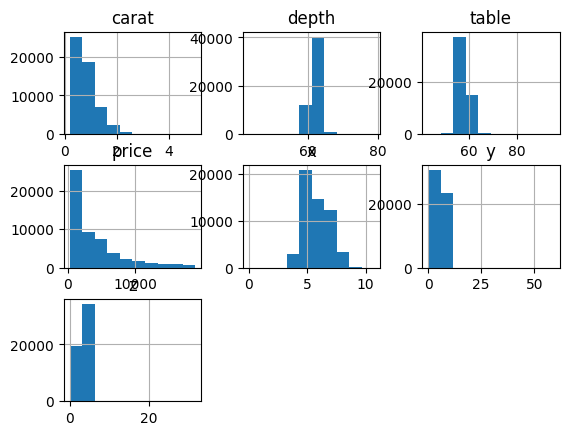

In [47]:
# plot df histogram
df.hist()

In [48]:
# transform value from categorigal columns to 0/1

df = pd.get_dummies(df, columns=['cut'], prefix = ['cut'])
df = pd.get_dummies(df, columns=['color'], prefix = ['color'])
df = pd.get_dummies(df, columns=['clarity'], prefix = ['clarity'])


In [49]:
seed = 999

# Split the dataset into features (X) and the target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into a training set and a testing set (e.g., 70% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create DataFrame to get results
result = pd.DataFrame(columns=['Model', 'MSE', 'R2 Score'])

In [50]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

new_row = {'Model': 'Linear Reg', 'MSE': mse, 'R2 Score': r2}
result = result.append(new_row, ignore_index=True)

print("Mean Squared Error:\n", "{:.2f}".format(mse))
print("Mean Squared Error:\n", mse)
print("R2 Score:\n", "{:.2f}".format(r2))

Mean Squared Error:
 1288705.48
Mean Squared Error:
 1288705.4778516733
R2 Score:
 0.92


In [51]:
# Create and train the Lasso model
model = Lasso()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

new_row = {'Model': 'Lasso', 'MSE': mse, 'R2 Score': r2}
result = result.append(new_row, ignore_index=True)

print("Mean Squared Error:\n", "{:.2f}".format(mse))
print("R2 Score:\n", "{:.2f}".format(r2))

Mean Squared Error:
 1288437.32
R2 Score:
 0.92


In [52]:
# Create and train the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

new_row = {'Model': 'DT Reg', 'MSE': mse, 'R2 Score': r2}
result = result.append(new_row, ignore_index=True)

print("Mean Squared Error:\n", "{:.2f}".format(mse))
print("R2 Score:\n", "{:.2f}".format(r2))

Mean Squared Error:
 547907.66
R2 Score:
 0.97


In [53]:
# Create and train the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

new_row = {'Model': 'RF Reg', 'MSE': mse, 'R2 Score': r2}
result = result.append(new_row, ignore_index=True)

print("Mean Squared Error:\n", "{:.2f}".format(mse))
print("R2 Score:\n", "{:.2f}".format(r2))

Mean Squared Error:
 305211.55
R2 Score:
 0.98


In [54]:
# Create and train the K-Neighbors Regressor model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

new_row = {'Model': 'K-Neighbors R', 'MSE': mse, 'R2 Score': r2}
result = result.append(new_row, ignore_index=True)

print("Mean Squared Error:\n", "{:.2f}".format(mse))
print("R2 Score:\n", "{:.2f}".format(r2))

Mean Squared Error:
 675778.50
R2 Score:
 0.96


In [55]:
# Create and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

new_row = {'Model': 'GBR', 'MSE': mse, 'R2 Score': r2}
result = result.append(new_row, ignore_index=True)


print("Mean Squared Error:\n", "{:.2f}".format(mse))
print("R2 Score:\n", "{:.2f}".format(r2))

Mean Squared Error:
 517483.05
R2 Score:
 0.97


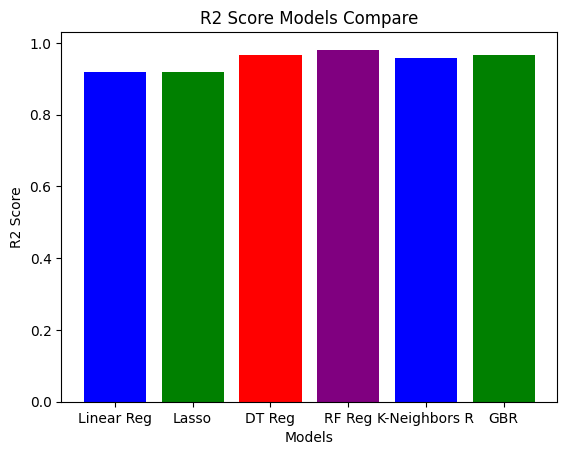

In [72]:
columns = result['Model']
values = result['R2 Score']
colors = ['blue', 'green', 'red', 'purple']

# Create a bar graph

plt.bar(columns, values, color = colors)

# Add labels and a title
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Models Compare')

# Show the plot
plt.show()

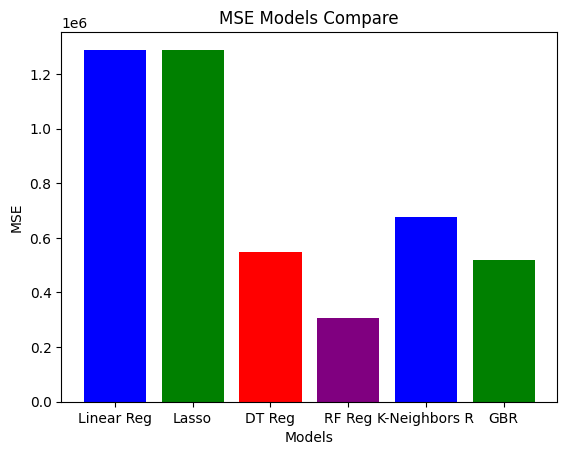

In [74]:
# supress scientific notation
pd.options.display.float_format = '{:.0f}'.format

columns = result['Model']
values = result['MSE']
colors = ['blue', 'green', 'red', 'purple']

# Create a bar graph

plt.bar(columns, values, color = colors)

# Add labels and a title
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Models Compare')

# Show the plot
plt.show()